<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


1. Load in your dataset through its CSV link.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *




In [2]:
df=pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv')

2. Find out some information about the data...

In [3]:
df.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [4]:
df.tail()

,height,weight,target,type
195,55.0,140.0,1.0,horse
196,82.0,179.0,1.0,horse
197,46.0,132.0,1.0,horse
198,56.0,89.0,1.0,horse
199,58.0,98.0,1.0,horse


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.sample()

,height,weight,target,type
104,46.0,171.0,1.0,horse


In [7]:
df.shape

(200, 4)

In [8]:
df.describe

<bound method NDFrame.describe of      height  weight  target   type
0      27.0    71.0     0.0    dog
1      27.0    92.0     0.0    dog
2      32.0    47.0     0.0    dog
3      30.0    90.0     0.0    dog
4      28.0    91.0     0.0    dog
..      ...     ...     ...    ...
195    55.0   140.0     1.0  horse
196    82.0   179.0     1.0  horse
197    46.0   132.0     1.0  horse
198    56.0    89.0     1.0  horse
199    58.0    98.0     1.0  horse

[200 rows x 4 columns]>

In [9]:
# Identify if there is any missing values

df.isnull().sum()


height    0
weight    0
target    0
type      0
dtype: int64

In [10]:
df.type.value_counts()

horse    100
dog      100
Name: type, dtype: int64

In [11]:
df.target.value_counts()

1.0    100
0.0    100
Name: target, dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [12]:
corr=df.corr()
corr

,height,weight,target
height,1.000000,0.703149,0.842168
weight,0.703149,1.000000,0.771663
target,0.842168,0.771663,1.000000


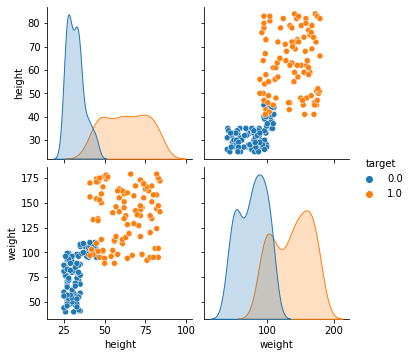

In [13]:
sns.pairplot(df, hue='target') # seems wierd that's dog's hieght is greater than the hourse's


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


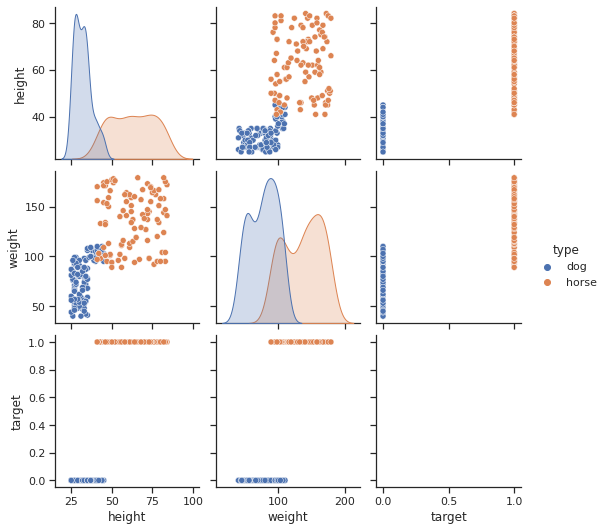

In [14]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="type")


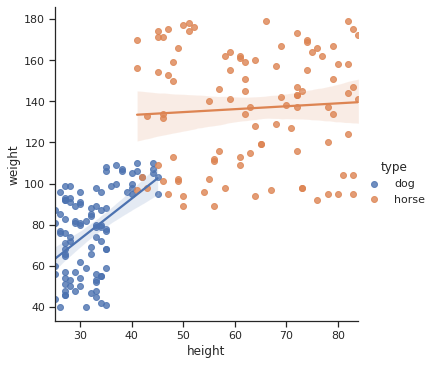

In [15]:
sns.lmplot(
    data=df,
    x="height", y="weight", hue="type",
    height=5
)


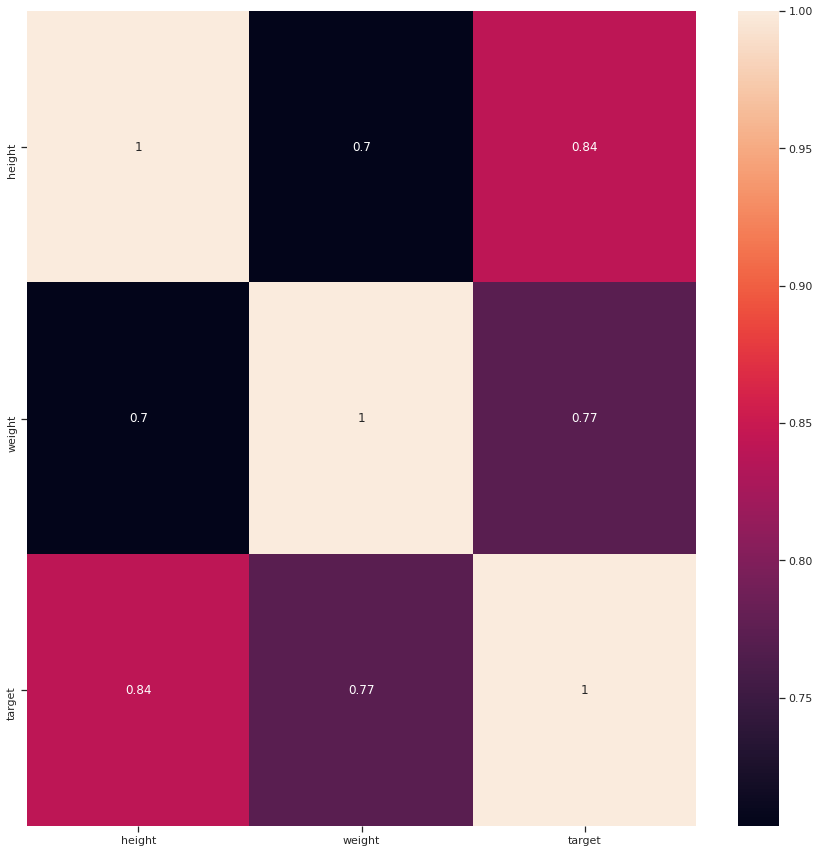

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [17]:
df.columns

Index(['height', 'weight', 'target', 'type'], dtype='object')

4. Split your data into training and testing datasets...

In [18]:
from sklearn.model_selection import train_test_split


X = df[['height']]
y = df['target'].values



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [19]:
from sklearn.linear_model import LogisticRegression # 1- initialze the model

lr = LogisticRegression()

In [20]:
lr.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [21]:
# Predict for training set
y_train_predict = lr.predict(X_train)

y_train_predict

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1.])

In [22]:
# Predict for training set
y_test_predict  = lr.predict(X_test)


In [23]:
# what do they look like? (show me some of the predictions)
y_test_predict

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1.])

7. Score your model...
- accuracy_score
- confusion_matrix

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predict )


0.9833333333333333

In [25]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict

r2  = r2_score(y_true, y_pred)
r2

0.9282296650717703

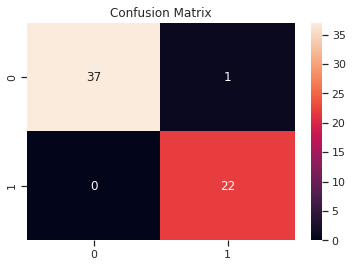

In [26]:
con = lr.predict(X_test)
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True).set_title("Confusion Matrix");


8. Create, and fit a LogisticRegression model with **more than** 1 variable

In [27]:
df.columns

Index(['height', 'weight', 'target', 'type'], dtype='object')

In [28]:
X=df[['height', 'weight']]
y=df.target
z = df[list(X)].values


X_train, X_test, y_train, y_test = train_test_split(z, y, train_size=0.7)


In [29]:

lr2 = LogisticRegression()

In [30]:
lr2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [31]:
# Predict for training set
y_train_predict2 = lr2.predict(X_train)

y_train_predict2

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1.])

In [32]:
y_test_predict2  = lr2.predict(X_test)
y_test_predict2

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0.])

In [33]:
# what do they look like? (show me some of the predictions)
y_test_predict[1:5]

array([1., 0., 0., 0.])

10. Score your model...
- accuracy_score
- confusion_matrix

In [34]:
accuracy_score(y_test,y_test_predict2 )

0.9166666666666666

In [35]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict2

r2  = r2_score(y_true, y_pred)
r2

0.6632996632996633

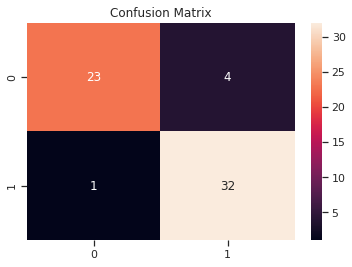

In [36]:
con = lr2.predict(X_test)
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True).set_title("Confusion Matrix");

11. Which model is better? Why?

When we did the comparison between the false positive in both models, we found that in 1st model the false positive chances are hiegher than the 2nd modele chances , so we obtain that when we use multiple featuer we got higher accuraty score 

12. Perform GridSearchCV with the better data

In [37]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid={ 'fit_intercept': [True, False],'solver': ['liblinear'],'max_iter': [10, 100, 250, 1000, 10000]}
LR =LogisticRegression()

grid =GridSearchCV(LR, param_grid, cv=7)






In [39]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [10, 100, 250, 1000, 10000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 10, 'solver': 'liblinear'}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [41]:

lr2 = LogisticRegression(fit_intercept= True, 
                        max_iter= 10 , 
                        solver='liblinear')

In [42]:
lr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lr2.predict(X_test)

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0.])

14. Score the new model... 
- r2_score
- some other metric of your choice

In [44]:
accuracy_score(y_test,y_test_predict2)

0.9166666666666666

In [45]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict2

r2  = r2_score(y_true, y_pred)
r2


0.6632996632996633

Did the score change at all? Why?

Our score is the same, The GridSearchCV is to show us if our preidctions are rights or not. So, as the scores matched, it mean that our predictions where right.

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

In [46]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=10000)

In [47]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:

sgdc.predict(X_test)

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [49]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.5666666666666667